In [116]:
from models.stage1.vq import VectorQuantize
from utils import load_yaml_param_settings
import numpy as np
import pandas
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
conf_dir = 'configs/config.yaml'

config = load_yaml_param_settings(conf_dir)

In [117]:
dim = 64
vq_std = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vqmodel-FordA.ckpt'
# vq_std.load_state_dict(torch.load(dir))

# vq_vib = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vibcreg_0.01_single_vqmodel-FordA.ckpt'
# vq_vib.load_state_dict(torch.load(dir))


# vq_vib_ort = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

# #load the vq model
# dir = 'saved_models_idun/vibcreg_0.01_orthogonal_single_vqmodel-FordA.ckpt'
# vq_vib_ort.load_state_dict(torch.load(dir))

In [119]:
#load the vq model
dir = 'saved_models_idun/vqmodel-UWaveGestureLibraryAll.ckpt'
vq_std.load_state_dict(torch.load(dir))

vq_vib = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

#load the vq model
dir = 'saved_models_idun/vibcreg_0.01_single_vqmodel-UWaveGestureLibraryAll.ckpt'
vq_vib.load_state_dict(torch.load(dir))


vq_vib_ort = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

#load the vq model
dir = 'saved_models_idun/vibcreg_0.01_orthogonal_single_vqmodel-UWaveGestureLibraryAll.ckpt'
vq_vib_ort.load_state_dict(torch.load(dir))

<All keys matched successfully>

In [120]:
codebook_std = vq_std.codebook.detach()
codebook_vib = vq_vib.codebook.detach()
codebook_vib_ort = vq_vib_ort.codebook.detach()


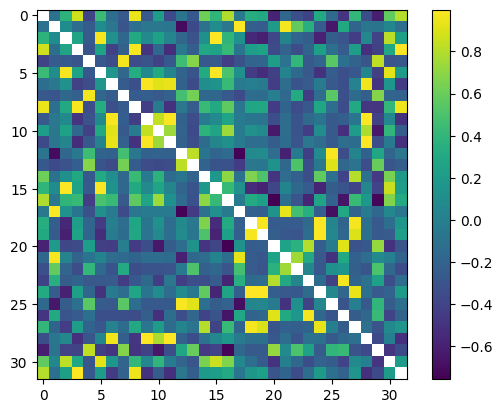

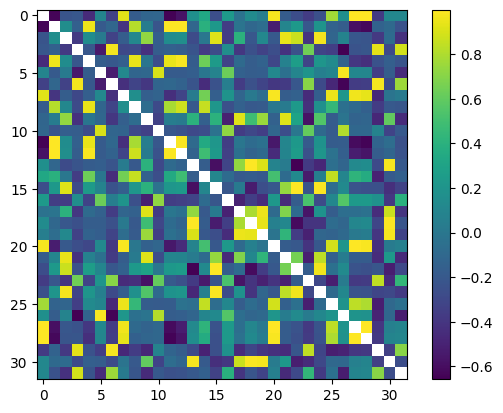

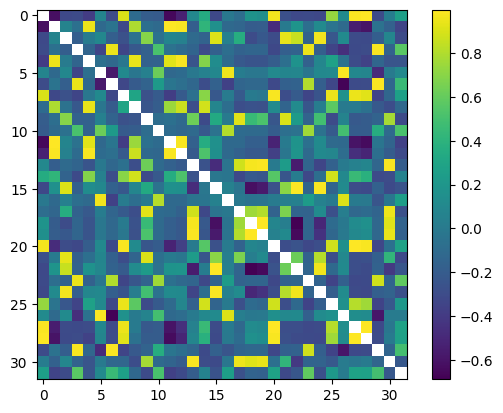

In [121]:

corr_std = torch.corrcoef(codebook_std)
corr_std.fill_diagonal_(np.nan)

corr_vib = torch.corrcoef(codebook_vib)
corr_vib.fill_diagonal_(np.nan)

corr_vib_ort = torch.corrcoef(codebook_vib_ort)
corr_vib_ort.fill_diagonal_(np.nan)

plt.imshow(corr_std)
plt.colorbar()
plt.show()
plt.close()
plt.imshow(corr_vib)
plt.colorbar()
plt.show()
plt.close()
plt.imshow(corr_vib_ort)
plt.colorbar()
plt.show()

In [122]:

corr_std = corr_std.flatten()
corr_std = corr_std[~torch.isnan(corr_std)]


corr_vib = corr_vib.flatten()
corr_vib = corr_vib[~torch.isnan(corr_vib)]

corr_vib_ort = corr_vib_ort.flatten()
corr_vib_ort = corr_vib_ort[~torch.isnan(corr_vib_ort)]



In [126]:
logits = torch.tensor([1.0,3.2,12.0])
sampled_ids = torch.distributions.categorical.Categorical(
                logits=logits
            )
torch.exp(sampled_ids.logits)

tensor([1.6699e-05, 1.5071e-04, 9.9983e-01])

(array([ 2.,  2.,  6.,  0.,  4.,  6.,  2.,  6.,  0.,  4.,  4.,  0.,  6.,
         4.,  2.,  0.,  2.,  2.,  4.,  6., 14., 24., 52., 32., 24., 10.,
        24., 20., 24., 26., 36., 40., 38., 32., 40., 18., 26., 18., 18.,
        20., 20., 30., 10., 16., 10., 20., 16., 24., 18.,  6., 12.,  8.,
         0.,  2.,  8.,  2.,  4.,  8.,  2.,  0.,  2.,  4.,  4.,  2.,  0.,
         4.,  0.,  6.,  0.,  2.,  4.,  6.,  2.,  2.,  4.,  2.,  0.,  6.,
         0.,  0.,  2.,  4.,  4.,  0.,  4.,  6.,  2.,  2.,  8.,  2.,  0.,
         4.,  6.,  4., 10.,  6., 10., 12., 16., 26.]),
 array([-0.68952751, -0.67264467, -0.65576184, -0.63887894, -0.6219961 ,
        -0.60511327, -0.58823043, -0.57134759, -0.55446476, -0.53758186,
        -0.52069902, -0.50381619, -0.48693335, -0.47005051, -0.45316765,
        -0.43628481, -0.41940197, -0.40251911, -0.38563627, -0.36875343,
        -0.35187057, -0.33498773, -0.31810489, -0.30122203, -0.28433919,
        -0.26745635, -0.25057349, -0.23369065, -0.2168078 , -0.199924

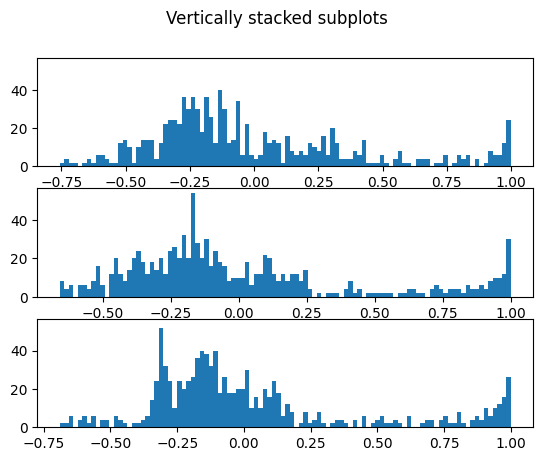

In [123]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey= True)
fig.suptitle('Vertically stacked subplots')
ax1.hist(corr_std, bins=100) 
ax2.hist(corr_vib, bins=100) 
ax3.hist(corr_vib_ort, bins=100) 


# plt.hist(corr_std, bins=100) 
# plt.show()
# plt.close()

# plt.hist(corr_vib, bins=100) 
# plt.show()
# plt.close()

# plt.hist(corr_vib_ort, bins=100)  
# plt.show()
# plt.close()